5 Baris Pertama Data:
         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77   

   Quantit

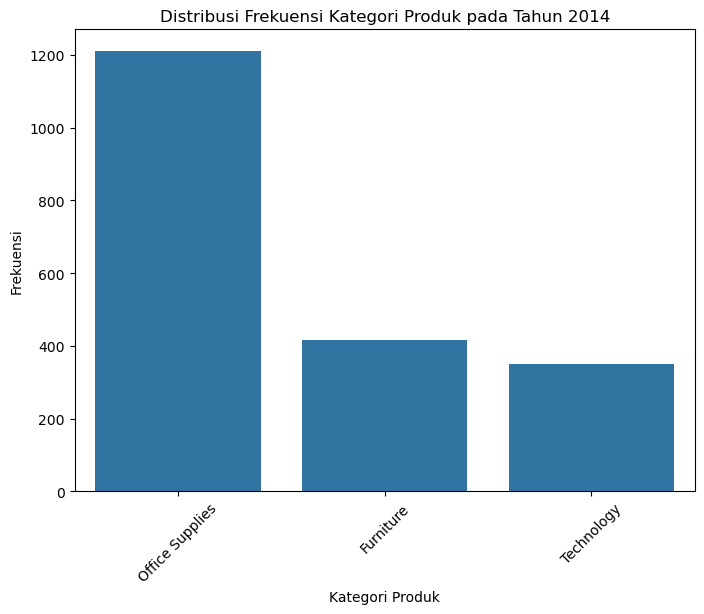

2. Distribusi Frekuensi Produk dengan Kategori Furniture
Product Name
KI Adjustable-Height Table                                                            18
Staple-based wall hangings                                                            16
Situations Contoured Folding Chairs, 4/Set                                            15
Global High-Back Leather Tilter, Burgundy                                             14
Global Wood Trimmed Manager's Task Chair, Khaki                                       14
Eldon Wave Desk Accessories                                                           14
Chromcraft Round Conference Tables                                                    13
SAFCO Arco Folding Chair                                                              13
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back                           12
Flat Face Poster Frame                                                                12
Bretford Rectangular Conference Table To

C:\Users\muham\AppData\Local\Temp\ipykernel_27564\912443805.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_distribution.index[:20], x=product_distribution.values[:20], palette='magma')


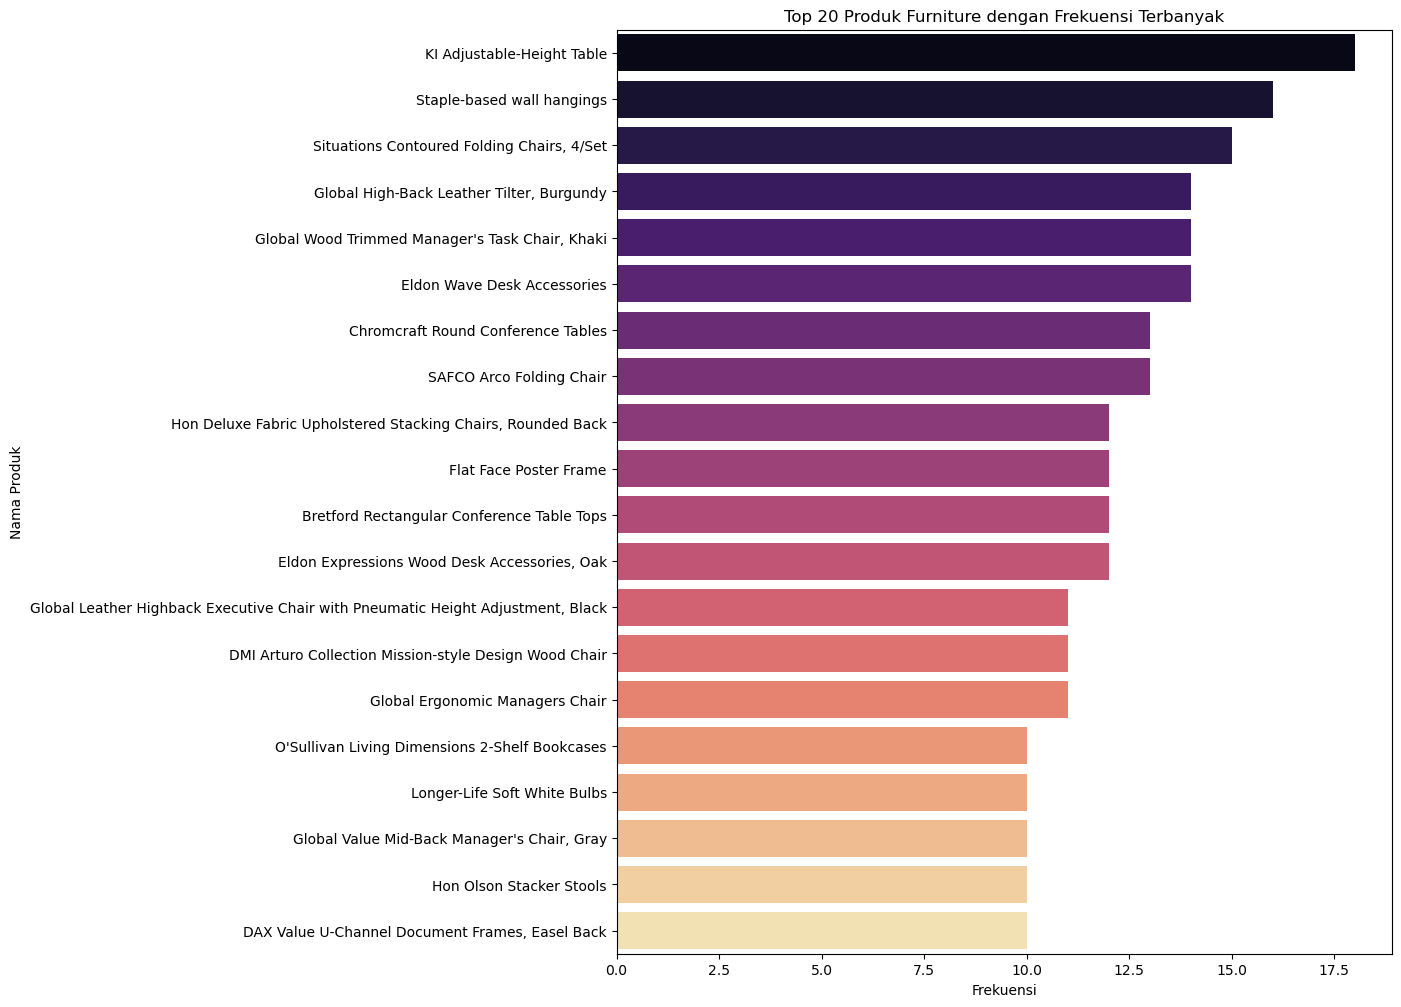

3. Produk dengan frekuensi terbanyak pada kategori Technology
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling 

4. Distribusi Frekuensi Transaksi per Tahun di Kota DKI Jakarta (2014-2017)
Year
2014    283
2015    297
2016    365
2017    467 



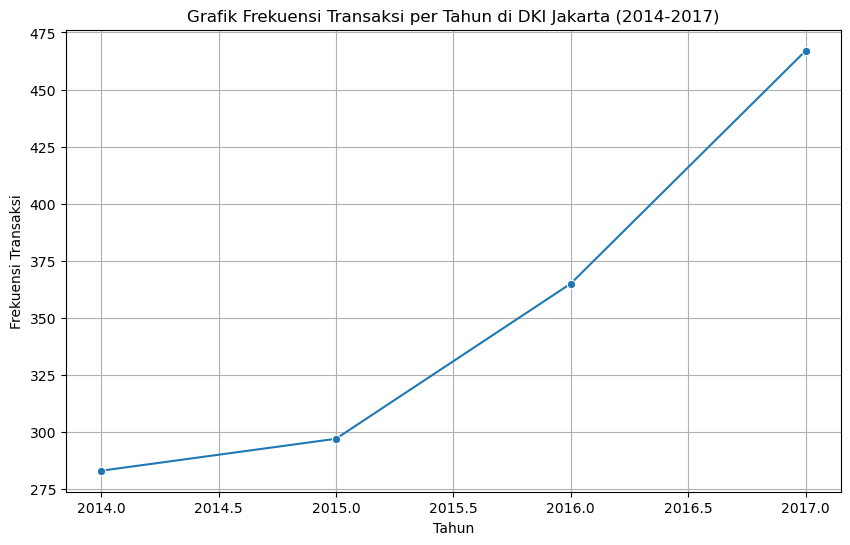

5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015
59.08%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan grafik muncul dengan baik di Jupyter Notebook
%matplotlib inline

# Baca file CSV dengan validasi encoding
file_path = "Data Sales.csv"
try:
    df = pd.read_csv(file_path, encoding='windows-1252', delimiter=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8', delimiter=';')

# Menampilkan informasi dasar dataset
print("5 Baris Pertama Data:")
print(df.head(), "\n")

# Pastikan semua kolom tidak memiliki spasi di awal/akhir
df.columns = df.columns.str.strip()

# 1. Distribusi Frekuensi Kategori Produk pada Tahun 2014
if 'Year' in df.columns and 'Category' in df.columns:
    df_2014 = df[df['Year'] == 2014]
    category_distribution = df_2014['Category'].value_counts()

    print("1. Distribusi Frekuensi Kategori Produk pada Tahun 2014")
    print(category_distribution.to_string(), "\n")

    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_distribution.index, y=category_distribution.values)
    plt.title('Distribusi Frekuensi Kategori Produk pada Tahun 2014')
    plt.xlabel('Kategori Produk')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'Year' atau 'Category' tidak ditemukan dalam dataset.\n")

# 2. Distribusi Frekuensi Produk dengan Kategori Furniture
if 'Category' in df.columns and 'Product Name' in df.columns:
    df_furniture = df[df['Category'] == 'Furniture']
    product_distribution = df_furniture['Product Name'].value_counts()

    print("2. Distribusi Frekuensi Produk dengan Kategori Furniture")
    print(product_distribution.to_string(), "\n")

    plt.figure(figsize=(10, 12))
    sns.barplot(y=product_distribution.index[:20], x=product_distribution.values[:20], palette='magma')
    plt.title('Top 20 Produk Furniture dengan Frekuensi Terbanyak')
    plt.xlabel('Frekuensi')
    plt.ylabel('Nama Produk')
    plt.show()
else:
    print("Kolom 'Category' atau 'Product Name' tidak ditemukan dalam dataset.\n")

# 3. Produk dengan Penjualan Terbanyak pada Kategori Technology
if 'Category' in df.columns and 'Product Name' in df.columns:
    df_technology = df[df['Category'] == 'Technology']
    if not df_technology.empty:
        top_selling_product = df_technology['Product Name'].value_counts().idxmax()
        print("3. Produk dengan frekuensi terbanyak pada kategori Technology")
        print(top_selling_product, "\n")
    else:
        print("Tidak ada data untuk kategori Technology.\n")
else:
    print("Kolom 'Category' atau 'Product Name' tidak ditemukan dalam dataset.\n")

# 4. Grafik Penjualan per Tahun di Kota DKI Jakarta (2014 - 2017)
if 'City' in df.columns and 'Year' in df.columns:
    df_jakarta = df[df['City'] == 'DKI Jakarta']
    transactions_per_year = df_jakarta.groupby('Year').size()

    print("4. Distribusi Frekuensi Transaksi per Tahun di Kota DKI Jakarta (2014-2017)")
    print(transactions_per_year.to_string(), "\n")

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=transactions_per_year.index, y=transactions_per_year.values, marker='o')
    plt.title('Grafik Frekuensi Transaksi per Tahun di DKI Jakarta (2014-2017)')
    plt.xlabel('Tahun')
    plt.ylabel('Frekuensi Transaksi')
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'City' atau 'Year' tidak ditemukan dalam dataset.\n")

# 5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015
if {'Year', 'Segment', 'Category'}.issubset(df.columns):
    df_2015_corporate = df[(df['Year'] == 2015) & (df['Segment'] == 'Corporate')]
    total_corporate_transactions = df_2015_corporate.shape[0]
    office_supplies_transactions = df_2015_corporate[df_2015_corporate['Category'] == 'Office Supplies'].shape[0]

    probability = office_supplies_transactions / total_corporate_transactions if total_corporate_transactions > 0 else 0
    print("5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015")
    print(f"{probability:.2%}")
else:
    print("Kolom 'Year', 'Segment', atau 'Category' tidak ditemukan dalam dataset.\n")
